In [16]:
import pathlib
import os
from PIL import Image

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px

import pickle
from sklearn.decomposition import IncrementalPCA, PCA

In [17]:
# create a dataset and dataloader for the data
data_dir_train = pathlib.Path('../../data/kvasir-seg/Kvasir-SEG-processed/train/images')
data_dir_test = pathlib.Path('../../data/kvasir-seg/Kvasir-SEG-processed/test/images')
data_dir_val = pathlib.Path('../../data/kvasir-seg/Kvasir-SEG-processed/val/images')

In [18]:
# read each image from the folder and convert it to a numpy array, center crop it and flatten it, add it to the dataset
def create_dataset(data_dir):
    index = []
    dataset = []
    for img in data_dir.iterdir():
        index.append(str(img).split('/')[-1].split('.')[0])
        dataset.append(np.array(Image.open(img)).flatten().reshape(1, -1))
    return dataset, index

In [19]:
output = create_dataset(data_dir_train)

In [20]:
dataset = np.concatenate(output[0], axis=0)
index = output[1]

In [21]:
# delete output to save memory
del output

In [22]:
# apply PCA to the dataset
pca = PCA(n_components=512)#IncrementalPCA(n_components=400, batch_size=500)
pca.fit(dataset)
print(pca.explained_variance_ratio_)

[1.81487108e-01 1.36840543e-01 1.08469019e-01 6.78740681e-02
 5.37110153e-02 3.82070716e-02 2.87757078e-02 2.48712930e-02
 2.14099386e-02 1.86374739e-02 1.57845821e-02 1.29209064e-02
 1.07322101e-02 1.02807972e-02 9.36692486e-03 7.77093964e-03
 7.45410663e-03 6.89571151e-03 6.20722535e-03 5.74676710e-03
 5.21861584e-03 4.70566267e-03 4.50212326e-03 4.43524796e-03
 4.02459476e-03 3.82320808e-03 3.67725550e-03 3.48255008e-03
 3.36043773e-03 3.30565714e-03 3.13153472e-03 3.05839908e-03
 2.92793774e-03 2.86079224e-03 2.65605850e-03 2.59825769e-03
 2.55890254e-03 2.39014232e-03 2.32270035e-03 2.20952666e-03
 2.14534196e-03 1.99936056e-03 1.98900669e-03 1.96484111e-03
 1.90039015e-03 1.86993513e-03 1.80635427e-03 1.74278114e-03
 1.67821534e-03 1.64898481e-03 1.60536333e-03 1.55355806e-03
 1.47948614e-03 1.47116858e-03 1.46590618e-03 1.41043175e-03
 1.33572961e-03 1.30739327e-03 1.28197677e-03 1.27567180e-03
 1.23989955e-03 1.21261753e-03 1.16493477e-03 1.16465404e-03
 1.13654398e-03 1.090227

In [23]:
print(sum(pca.explained_variance_ratio_))

0.9881896429753425


In [24]:
# save the pca model to a file
with open('pca_kvasir.pkl', 'wb') as f:
    pickle.dump(pca, f)

In [25]:
train = pca.transform(dataset)
df_train = pd.DataFrame(train, index=index)
df_train.index = index
df_train

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
cju43jcqim2cp08172dvjvyui,-2829.419859,-4360.309411,-575.059686,1007.094318,4562.158640,-883.438753,-69.868939,1725.233639,-1711.060824,-999.529970,...,-44.676451,114.288722,20.866908,-37.097454,-209.677129,-35.224785,-16.851047,114.504894,72.554146,-41.800830
cju88oh0po9gq0801nge4tgr1,-516.297794,-5386.019764,-1471.249504,2471.775313,-828.526101,2759.242421,256.652930,47.824027,-497.403221,1113.931868,...,4.853969,-16.652698,53.269610,-83.803114,-34.860047,-143.235185,-70.299848,16.283228,90.708129,-1.834795
cju45rj7ln8980850a7821fov,-2989.770061,-2558.644601,-2974.837212,-3068.348387,-3022.624719,-1574.522367,-1070.869399,-45.941306,-100.983416,905.280411,...,-34.311425,94.718882,-20.698240,-203.332440,-53.857884,7.651053,-120.300438,18.094047,84.607145,-263.666354
cju5hwonqedw10801vsd3w6kk,1539.473072,1843.359953,-1086.343915,3024.463496,-2475.832786,1763.051573,-385.294952,-498.515954,-136.304413,2003.789081,...,-17.013456,-192.648105,3.499378,126.607786,-12.634792,-80.285525,-100.132258,-56.747742,54.610658,111.832531
cju8dm2cau2km0818jsv9eeq2,986.914127,-4013.177708,-5294.217474,-1189.628866,1745.764914,2770.921274,-4236.044639,-284.615932,-3233.357083,1928.534849,...,-0.058568,-42.012987,-41.720214,57.370761,-51.408808,17.326587,41.413629,-48.637554,105.648122,16.147830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cju5v8pgplg6k0755rvi2t63h,-336.593048,6217.733553,5752.746816,-749.010361,2215.462002,335.772625,-1283.862929,-1873.475729,966.929337,1184.897512,...,3.689052,289.687525,-35.172332,118.614881,-162.672673,-119.394928,131.552617,-15.317916,-185.079505,-69.209368
cju2htabevq9108015qjei0x7,-5957.484171,-2257.143676,1168.685153,1520.690698,-2616.558776,-4513.929859,1895.456089,-1684.475886,-2405.612723,-1659.792496,...,43.580586,-172.380468,-27.530237,26.518656,20.600893,-114.718442,-20.069842,-100.430861,158.355433,-2.692102
cju5vbo6jldrt0871jf6f1700,-7042.096402,-2534.083826,1257.557689,-6674.670390,-1375.725261,4696.164410,-1451.657865,4032.451929,-73.317809,-1628.076774,...,75.027284,6.894385,7.000588,-151.521375,-59.280503,-129.239142,-200.741809,-51.916895,-110.983819,33.256159
cju414lf2l1lt0801rl3hjllj,3033.751099,5149.715549,-132.858255,-2866.178580,-2935.555271,-571.261223,1882.331310,535.736781,6.803848,784.868660,...,108.845388,154.005633,11.161193,36.286864,-122.886505,-4.421915,94.475729,39.829909,-79.266912,-47.005902


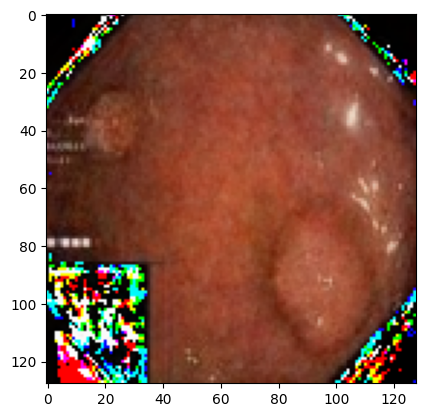

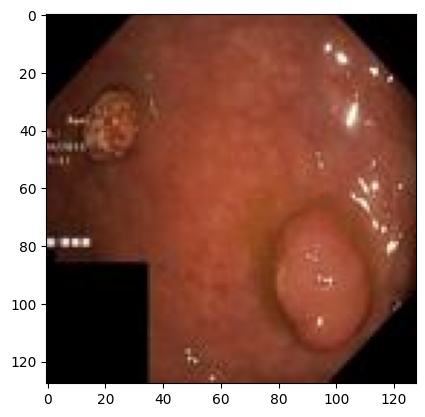

In [26]:
# try reconstructing the the first image and compare it to the original
reconstructed = pca.inverse_transform(train[2].reshape(1, -1))
reconstructed = reconstructed.reshape(128, 128, 3)
plt.imshow(reconstructed.astype('uint8'))
plt.show()

original = dataset[2].reshape(128, 128, 3)
plt.imshow(original.astype('uint8'))
plt.show()

In [27]:
df_train.to_csv('train_pca_kvasir.csv')

In [28]:
del df_train

In [29]:
# create a dataset for the test data
output = create_dataset(data_dir_test)

In [30]:
dataset = np.concatenate(output[0], axis=0)
index = output[1]

In [31]:
test = pca.transform(dataset)
df_test = pd.DataFrame(test, index=index)
df_test.index = index
df_test.to_csv('test_pca_kvasir.csv')
df_test

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
cju7ejm2l2ncl0801wq6y84nw,-3247.901488,-2592.028653,-3601.535889,-3286.960363,126.876492,-1184.741814,-125.394669,853.158284,68.141525,1434.811269,...,17.880308,-14.744217,-5.666535,-36.192289,56.992746,-42.751756,-13.593211,-39.855969,93.853048,-135.654097
cju87xn2snfmv0987sc3d9xnq,-3236.812333,6785.064213,-4037.894249,-1117.141357,-4072.582740,1905.797675,-662.744132,5311.157740,-2927.568563,1923.996461,...,-100.664348,-89.445430,-37.976767,9.643125,-48.799404,34.001873,-115.338072,51.192977,-162.180478,37.480926
cju85rkbnlo1c08503uxcpax1,-678.405249,-4614.874903,-3238.382072,-1482.517852,2003.784046,3762.199413,-1062.834462,-205.499350,45.110220,-140.490884,...,100.164697,-17.001187,-23.912073,-53.638350,-2.047129,-55.388221,-60.287693,-64.868606,35.952600,54.171303
cju84kplnl1y30755ropua1b0,3014.818076,4422.615417,-872.872541,2983.651159,-1798.877180,-1853.045905,-1981.500437,1277.124059,2622.820540,-1973.526671,...,-45.367175,5.478910,79.876102,-28.264808,-20.716685,109.876319,-75.723812,8.274081,58.614832,-79.026188
cju5uhrdwkmsu0817ervv91l8,-5096.548194,-2221.115728,-2332.650132,-4433.462513,2110.834537,-2421.571457,5128.982301,-1185.729704,-1553.497705,1731.164092,...,-76.663647,8.764742,163.155890,18.949317,-43.121119,-98.471144,-5.776646,4.770989,-89.648310,86.410256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cju5enq1tcn1i0755hnkon787,-365.370681,-1284.167975,-2620.629242,3211.540483,4528.056239,112.083685,1951.424697,1449.988889,281.751985,1441.050191,...,-1.769907,-19.567602,-33.388691,68.505512,-7.129114,13.768779,40.527206,38.945671,-20.534976,23.893247
cju5fs6j6d8350801vglraq4u,207.627862,-961.793013,-4227.604562,1349.979667,1834.763674,2329.799920,-827.970417,1677.332458,896.130151,2010.741031,...,-41.706276,-161.904810,1.850170,7.331059,-72.846011,-78.150291,20.064504,-45.318911,-58.376231,19.481426
cju5bf6hxa6m50817rbwettgu,-2524.079319,-1376.768151,-1785.777901,564.444513,3577.435605,1876.974705,-3088.712428,-1631.510404,-2912.904903,1711.603211,...,23.485479,-18.579849,-38.328696,-127.929817,-30.321774,-12.445311,5.539556,-14.064536,-3.147601,12.213137
cju5vcmrqla7i0817x4sp4pqw,-579.226266,1489.744597,510.065782,539.031786,-3757.489594,-4539.790060,3301.900782,2111.154085,3028.076067,-124.431252,...,-65.920193,47.494469,-48.798831,-24.219051,60.389309,120.651327,-110.973316,28.520442,-41.622786,25.881936


In [32]:
del df_test

In [33]:
# create a dataset for the validation data
output = create_dataset(data_dir_val)

In [34]:
dataset = np.concatenate(output[0], axis=0)
index = output[1]
del output

In [35]:
val = pca.transform(dataset)
df_val = pd.DataFrame(val, index=index)
df_val.index = index
df_val.to_csv('val_pca_kvasir.csv')
df_val

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
cju8a56vxpy780850r45yu4wk,3474.859202,7889.689321,172.731287,-856.714076,-3297.450424,3142.862790,34.653754,-1239.244418,799.547869,-555.048350,...,-33.590383,-68.936343,109.052613,49.711287,-15.735344,-27.491681,49.230417,-54.360772,23.427004,3.798034
cju8aj01yqeqm0850lhdz3xdw,-4201.187727,1618.599417,-5342.277157,-3861.397065,2183.006902,-2212.915241,1856.874475,-8.768392,102.124758,-1858.700218,...,17.230657,-59.366752,28.790734,87.568462,-47.811271,-35.973884,-4.710663,-29.032773,-46.983965,0.009925
cju7dsrtb2f8i085064kwugfk,3106.262694,1952.938068,-10401.351882,-1772.496639,804.774599,3337.938970,1010.905852,157.628793,915.767467,-330.016587,...,23.494547,68.838582,75.152681,0.553884,54.135687,78.261569,105.535136,-55.272098,-55.273365,-32.243058
cju2nguelpmlj0835rojdn097,-1978.251716,2839.268613,4281.827945,2604.297658,2564.122412,1649.519866,81.680279,-827.071793,-292.851946,-255.277954,...,48.497470,57.994259,28.676617,-97.332787,-47.043782,-12.098186,10.052928,-79.319754,57.609255,33.124734
cju1819curo000988pd5xcqme,9124.916076,2031.510605,519.795570,2235.517646,-97.361234,404.700488,-2899.876501,-376.409004,775.912237,91.141829,...,122.344541,85.834846,-44.753748,50.633766,-22.439733,-21.935828,-176.751340,-106.502708,67.816341,16.503287
cju2tjrog4jy30878pawyazqc,-2727.591273,-4910.814139,2951.058780,-4258.090159,-2236.213535,1779.928116,-2424.943501,-1376.142298,1870.900967,386.050364,...,-78.504372,-45.886558,-81.191711,148.919812,-47.621572,-33.984131,27.280862,-8.100822,41.535759,59.657414
cju35i2e63uxr0835h7zgkg9k,-4227.850925,-5831.161873,-1046.158893,279.060119,-770.259720,-4145.282695,2739.930616,674.434610,-46.641048,-1397.021453,...,-7.800324,-40.282108,-49.735591,59.028297,0.793551,-33.416060,-73.773282,121.942062,-25.146580,-40.065708
cju8dic9mtppa0987swn23wbc,9176.851579,4738.994229,-281.318833,-7025.016741,836.613027,1368.311088,-19.068315,-1566.380544,-2651.212617,911.229295,...,-38.551653,-27.238566,23.087590,-43.766715,-3.871307,-22.569946,-75.394732,72.909959,-40.841540,-30.895937
cju17r8il13910799dr2wme2e,-705.993374,3918.383165,-4349.638235,2379.448521,1402.286060,2630.074948,-2393.852440,524.452978,-1773.764858,2216.300914,...,4.524330,-15.463613,55.270278,48.894730,-121.400154,38.536991,10.869003,-56.084630,-2.238934,2.340216
cju2qtee81yd708787bsjr75d,3016.765791,-4691.679017,4020.162201,-6491.613176,939.071015,-2022.638822,307.142231,7420.195223,-365.388376,1495.405468,...,3.392658,54.409743,-38.904487,16.666859,-45.771396,34.091432,5.387403,5.058724,130.783119,14.967005
